In [1]:
import pandas as pd

In [19]:
df = pd.read_csv('D:\datasets\shopping_trends\shopping_trends\dataset\shopping_trends_updated.csv')

In [14]:
print(type(df['Age'][0]))

<class 'numpy.int64'>


In [20]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming df is your pandas DataFrame with categorical columns
label_maps = {}

for column in df.columns:
    if not pd.api.types.is_numeric_dtype(df[column]):  # Check if the column contains non-numeric data
        label_encoder = LabelEncoder()
        df[column] = label_encoder.fit_transform(df[column])
        label_maps[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print label maps
for column, label_map in label_maps.items():
    print(f"Label map for column '{column}': {label_map}")


Label map for column 'Gender': {'Female': 0, 'Male': 1}
Label map for column 'Item Purchased': {'Backpack': 0, 'Belt': 1, 'Blouse': 2, 'Boots': 3, 'Coat': 4, 'Dress': 5, 'Gloves': 6, 'Handbag': 7, 'Hat': 8, 'Hoodie': 9, 'Jacket': 10, 'Jeans': 11, 'Jewelry': 12, 'Pants': 13, 'Sandals': 14, 'Scarf': 15, 'Shirt': 16, 'Shoes': 17, 'Shorts': 18, 'Skirt': 19, 'Sneakers': 20, 'Socks': 21, 'Sunglasses': 22, 'Sweater': 23, 'T-shirt': 24}
Label map for column 'Category': {'Accessories': 0, 'Clothing': 1, 'Footwear': 2, 'Outerwear': 3}
Label map for column 'Location': {'Alabama': 0, 'Alaska': 1, 'Arizona': 2, 'Arkansas': 3, 'California': 4, 'Colorado': 5, 'Connecticut': 6, 'Delaware': 7, 'Florida': 8, 'Georgia': 9, 'Hawaii': 10, 'Idaho': 11, 'Illinois': 12, 'Indiana': 13, 'Iowa': 14, 'Kansas': 15, 'Kentucky': 16, 'Louisiana': 17, 'Maine': 18, 'Maryland': 19, 'Massachusetts': 20, 'Michigan': 21, 'Minnesota': 22, 'Mississippi': 23, 'Missouri': 24, 'Montana': 25, 'Nebraska': 26, 'Nevada': 27, 'New H

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
    

In [22]:
X = df.drop(['Purchase Amount (USD)'], axis=1)  # Features
y = df['Purchase Amount (USD)']  # Target variable

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import MinMaxScaler


In [26]:
scaler = MinMaxScaler()

In [27]:
X_train= scaler.fit_transform(X_train)

In [28]:
X_test = scaler.transform(X_test)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Assuming input shape is (106,) based on the number of features
input_shape = (17,)

model = tf.keras.Sequential([
 
    tf.keras.layers.Dense(units=64, activation='relu',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer='adam',  
               
              # MAE error is good for
              # numerical predictions
              loss='mae')

In [36]:
losses = model.fit(X_train, y_train,
 
                   validation_data=(X_test,y_test.values),
                    
                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=256, 
                   epochs=400,  # total epoch
 
                   )

Epoch 1/400

13/13 [==============================] - 1s 17ms/step - loss: 59.6593 - val_loss: 56.8032
Epoch 2/400
13/13 [==============================] - 0s 5ms/step - loss: 57.0047 - val_loss: 51.3546
Epoch 3/400
13/13 [==============================] - 0s 4ms/step - loss: 46.3967 - val_loss: 30.8205
Epoch 4/400
13/13 [==============================] - 0s 4ms/step - loss: 25.4101 - val_loss: 26.4419
Epoch 5/400
13/13 [==============================] - 0s 4ms/step - loss: 22.7828 - val_loss: 21.9294
Epoch 6/400
13/13 [==============================] - 0s 4ms/step - loss: 21.9415 - val_loss: 21.8552
Epoch 7/400
13/13 [==============================] - 0s 5ms/step - loss: 21.5816 - val_loss: 21.5167
Epoch 8/400
13/13 [==============================] - 0s 4ms/step - loss: 21.3350 - val_loss: 21.5205
Epoch 9/400
13/13 [==============================] - 0s 4ms/step - loss: 21.2466 - val_loss: 21.4415
Epoch 10/400
13/13 [==============================] - 0s 4ms/step - loss: 21.1182 - val_l

In [37]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

25/25 [==============================] - 0s 1ms/step


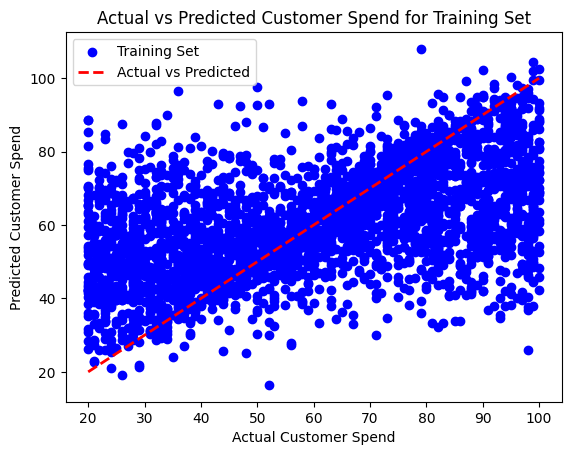

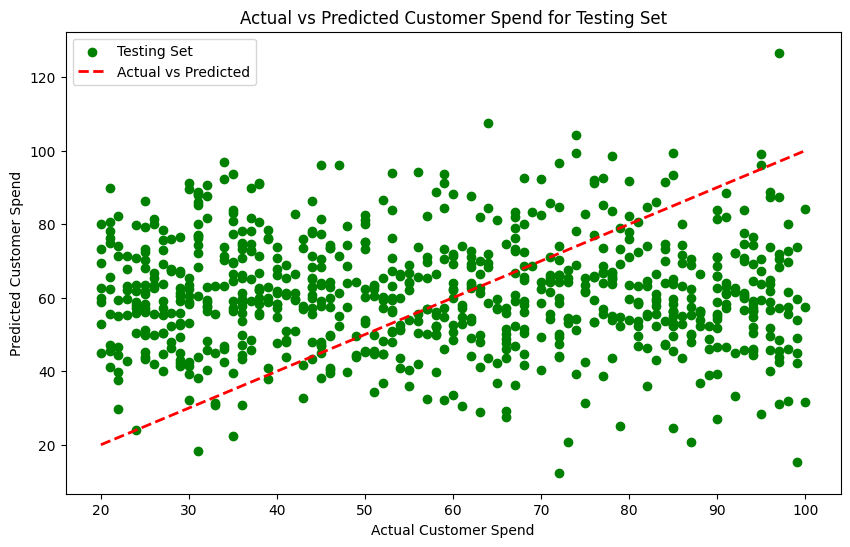

In [39]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_train_pred, color='blue', label='Training Set')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2, label='Actual vs Predicted')
plt.xlabel('Actual Customer Spend')
plt.ylabel('Predicted Customer Spend')
plt.title('Actual vs Predicted Customer Spend for Training Set')
plt.legend()
plt.show()

# Actual vs Predicted for testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Testing Set')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Actual vs Predicted')
plt.xlabel('Actual Customer Spend')
plt.ylabel('Predicted Customer Spend')
plt.title('Actual vs Predicted Customer Spend for Testing Set')
plt.legend()
plt.show()

In [40]:
path = "D:\datasets\shopping_trends\shopping_trends\saved"

model.save(path)

INFO:tensorflow:Assets written to: D:\datasets\shopping_trends\shopping_trends\saved\assets


INFO:tensorflow:Assets written to: D:\datasets\shopping_trends\shopping_trends\saved\assets
